<a href="https://colab.research.google.com/github/krishlazer/Event/blob/master/xcellent_gcb_tf_ke_nn_cust_churn_pred_confmatrix_clssfn_report_25052023_1930.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
dfcc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/telco_customer_churn.csv')

In [ ]:
dfcc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dfcc.drop(columns = ['customerID'], inplace=True)

In [ ]:
dfcc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dfcc.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
dfcc['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
dfcc[dfcc['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
dfcc = dfcc[dfcc['TotalCharges'] != ' ']

In [ ]:
dfcc

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
dfcc.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dfcc['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
dfcc['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [ ]:
internet_service_replace = {'No internet service' : 'No'}

In [ ]:
dfccv1 = dfcc.copy()

In [ ]:
dfccv1 = dfccv1.replace(internet_service_replace)

In [ ]:
dfccv1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
replace_app = {'OnlineSecurity' : {'No internet service' : 'No'},
               'OnlineBackup' : {'No internet service' : 'No'},
               'DeviceProtection' : {'No internet service' : 'No'}              
               }

In [ ]:
dfccv1 = dfccv1.replace(replace_app)

In [ ]:
dfccv1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dfccv1['StreamingTV'] = dfccv1['StreamingTV'].replace('No internet service' , 'No')

In [ ]:
dfccv1['OnlineSecurity'].value_counts()

No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

In [ ]:
dfccv1['StreamingTV'].value_counts()

No     4329
Yes    2703
Name: StreamingTV, dtype: int64

In [ ]:
dfccv1['DeviceProtection'].value_counts()

No     4614
Yes    2418
Name: DeviceProtection, dtype: int64

In [ ]:
dfccv1['TechSupport'].value_counts()

No     4992
Yes    2040
Name: TechSupport, dtype: int64

In [ ]:
dfccv1['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [ ]:
dfccv1['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [ ]:
dfccv1['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [ ]:
dfccv1['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [ ]:
dfccv1['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
dfccv1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
no_yes_encode = {'Yes' : 1, 'No' : 0}

In [ ]:
for col in dfccv1.columns:
  dfccv1[col] = dfccv1[col].replace(no_yes_encode)

In [ ]:
dfccv1.sample(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3076,Female,0,0,0,6,1,0,DSL,1,1,0,0,0,0,Month-to-month,0,Electronic check,56.25,389.1,1
6166,Female,0,1,1,31,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.20,3243.45,1
2793,Male,0,0,0,4,1,1,Fiber optic,1,0,0,0,0,0,Month-to-month,1,Electronic check,80.10,336.15,0
6258,Female,0,1,0,3,1,0,0,0,0,0,0,0,0,Month-to-month,1,Mailed check,19.90,45.75,0
813,Male,0,1,1,34,0,No phone service,DSL,1,0,0,0,0,0,One year,0,Bank transfer (automatic),30.40,938.65,0
4415,Male,0,1,0,66,1,1,DSL,1,1,1,0,0,0,Two year,1,Credit card (automatic),66.10,4428.45,0
5252,Male,1,1,0,71,1,1,Fiber optic,1,1,1,0,1,1,Month-to-month,1,Electronic check,107.50,7713.55,0
872,Male,0,0,1,66,1,0,0,0,0,0,0,0,0,Two year,0,Credit card (automatic),19.95,1269.1,0
6018,Male,0,0,0,33,1,0,0,0,0,0,0,0,0,Two year,0,Mailed check,20.35,689.75,0
5734,Male,0,1,1,72,1,1,DSL,1,1,1,1,1,1,Two year,1,Mailed check,89.40,6376.55,0


In [ ]:
dfccv1['StreamingMovies'].value_counts()

0    4301
1    2731
Name: StreamingMovies, dtype: int64

In [ ]:
dfccv1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
dfccv1['MultipleLines'].value_counts()

0    4065
1    2967
Name: MultipleLines, dtype: int64

In [ ]:
dfccv1['MultipleLines'] = dfccv1['MultipleLines'].replace('No phone service', 0)

In [ ]:
dfccv1['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
dfccv1['TotalCharges'] = pd.to_numeric(dfccv1['TotalCharges'])

In [ ]:
dfccv1['gender'] = dfccv1['gender'].replace({'Male' : 1, 'Female' : 0})

In [ ]:
dfccv1.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [ ]:
dfccv1['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
dfccv1[dfccv1['InternetService'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,1,0,0,0,16,1,0,0,0,0,0,0,0,0,Two year,0,Credit card (automatic),18.95,326.80,0
16,0,0,0,0,52,1,0,0,0,0,0,0,0,0,One year,0,Mailed check,20.65,1022.95,0
21,1,0,1,0,12,1,0,0,0,0,0,0,0,0,One year,0,Bank transfer (automatic),19.80,202.25,0
22,1,0,0,0,1,1,0,0,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.15,20.15,1
33,1,0,0,0,1,1,0,0,0,0,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,0,0,0,0,51,1,0,0,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),20.65,1020.75,0
7019,0,0,0,0,39,1,0,0,0,0,0,0,0,0,Two year,0,Mailed check,20.15,826.00,0
7020,1,0,1,1,12,1,0,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,19.20,239.00,0
7030,0,0,0,0,2,1,0,0,0,0,0,0,0,0,Month-to-month,1,Mailed check,20.05,39.25,0


In [ ]:
dfccv1.sample(30)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
608,1,0,1,1,72,1,1,Fiber optic,1,1,1,1,1,1,Two year,0,Bank transfer (automatic),114.55,8306.05,0
148,1,0,0,1,30,1,0,DSL,0,1,1,0,1,0,One year,0,Credit card (automatic),64.50,1929.95,0
4844,0,0,0,1,37,1,0,0,0,0,0,0,0,0,One year,0,Bank transfer (automatic),20.30,755.40,0
3335,1,0,0,0,12,1,1,0,0,0,0,0,0,0,Month-to-month,0,Electronic check,25.00,316.20,0
2564,1,0,0,0,18,1,1,DSL,0,0,1,1,1,1,One year,1,Credit card (automatic),82.00,1425.45,1
5109,1,0,1,1,66,1,0,DSL,1,1,1,1,0,0,Two year,0,Mailed check,65.85,4097.05,0
4175,1,0,1,1,61,1,0,0,0,0,0,0,0,0,One year,0,Mailed check,20.40,1226.45,0
4039,1,0,0,0,7,1,1,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Electronic check,94.10,701.30,0
4419,0,0,1,1,8,1,0,0,0,0,0,0,0,0,Month-to-month,0,Credit card (automatic),21.05,139.75,0
4025,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Bank transfer (automatic),74.80,321.90,1


In [ ]:
dfccv1['InternetService'] = dfccv1['InternetService'].replace(0, 'No')

In [ ]:
dfccv1['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [ ]:
dfccv1 = pd.get_dummies(dfccv1, columns = ['InternetService', 'PaymentMethod', 'Contract'], prefix_sep='_')

In [ ]:
dfccv1.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
5,0,0,0,0,8,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
6,1,0,0,1,22,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,0,1,0,28,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
9,1,0,0,1,62,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
dfccv1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
dfccv1.shape

(7032, 27)

In [ ]:
mms = MinMaxScaler()

In [ ]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
dfccv1['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:
dfccv1[cols_to_scale] = mms.fit_transform(dfccv1[cols_to_scale])

In [ ]:
dfccv1.sample(30)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
6938,0,0,1,1,0.929577,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2904,1,0,0,0,0.338028,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
5200,0,0,1,1,0.971831,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
407,1,1,1,1,0.436620,1,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
3421,0,0,1,0,1.000000,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1388,0,0,1,1,0.154930,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
282,0,0,0,1,0.000000,1,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
964,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3501,0,0,1,1,0.816901,1,1,1,0,1,...,1,0,0,0,0,0,1,0,0,1
63,0,0,1,1,0.239437,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
dfccv1['MonthlyCharges'].unique()

array([0.11542289, 0.38507463, 0.35422886, ..., 0.44626866, 0.25820896,
       0.60149254])

In [ ]:
dfccv1['Churn'].unique()

array([0, 1])

In [ ]:
x = dfccv1.iloc[:, :-1]
y = dfccv1.iloc[:, -1]

In [ ]:
xtr, xte, ytr, yte = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [ ]:
model = Sequential([
  keras.layers.Dense(10, activation = 'relu', input_shape = (26,)),
  # keras.layers.Dense(20, activation = 'relu'),
  keras.layers.Dense(1, activation = 'sigmoid')
])
    

In [ ]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(xtr, ytr, epochs = 20)

Epoch 1/20
176/176 [==============================] - 1s 3ms/step - loss: 0.5825 - accuracy: 0.7067
Epoch 2/20
176/176 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8789
Epoch 3/20
176/176 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.9604
Epoch 4/20
176/176 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9861
Epoch 5/20
176/176 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9957
Epoch 6/20
176/176 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9977
Epoch 7/20
176/176 [==============================] - 1s 3ms/step - loss: 0.0282 - accuracy: 0.9988
Epoch 8/20
176/176 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9995
Epoch 9/20
176/176 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9996
Epoch 10/20
176/176 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9998

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                270       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(xte, yte)

44/44 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000


[0.0016222705598920584, 1.0]

In [ ]:
ypreds = model.predict(xte)

44/44 [==============================] - 0s 2ms/step


In [ ]:
ypreds

array([[1.6677822e-04],
       [8.1609702e-05],
       [9.9845195e-01],
       ...,
       [1.7595490e-05],
       [3.6009002e-05],
       [1.2522685e-05]], dtype=float32)

In [ ]:
ypreds = np.rint(ypreds)

In [ ]:
ypreds

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
cr = classification_report(yte, ypreds)

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1099
           1       1.00      1.00      1.00       308

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



In [ ]:
cm = confusion_matrix(yte, ypreds)

In [ ]:
cm

array([[1099,    0],
       [   0,  308]])

In [ ]:
cmd = ConfusionMatrixDisplay(cm, display_labels=None)

In [ ]:
cmd

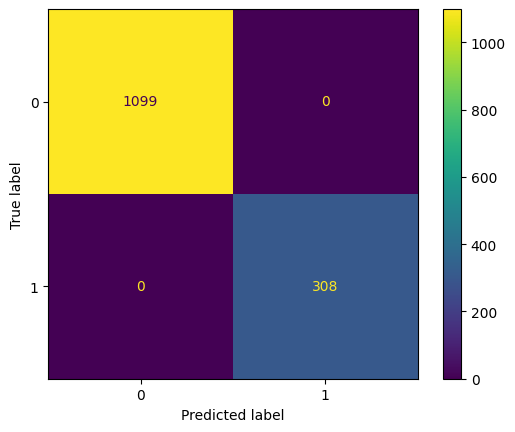

In [ ]:
cmd.plot()